## Grupo 23

**Nombre:** Raúl Miguel Carrero Martín 
**Nia**: 100451286 
**Grupo de clase**: 81

**Nombre:** Gonzalo Vela Sacristán
**Nia**: 100472334
**Grupo de clase**: 84

In [44]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install pickle
%pip install time
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


You are using pip version 10.0.1, however version 24.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You are using pip version 10.0.1, however version 24.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You are using pip version 10.0.1, however version 24.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You are using pip version 10.0.1, however version 24.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


  Could not find a version that satisfies the requirement pickle (from versions: )
No matching distribution found for pickle
You are using pip version 10.0.1, however version 24.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


  Could not find a version that satisfies the requirement time (from versions: )
No matching distribution found for time
You are using pip version 10.0.1, however version 24.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You are using pip version 10.0.1, however version 24.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


# 1.- Importación de los datos y librerias

## 1.1.- Importar las librerias

Importamos las librerias necesarias para el analisis exploratorio de los datos (EDA).

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
import pickle
import matplotlib.pyplot as plt

# Librerías de métricas
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

# Librerías de modelos
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.linear_model import Lasso

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

# Librerías de búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV

## 1.2.- Importar los datos

Primero obtenemos los datos del csv ***wind_ava.csv*** en un data frame mediante la función `pd.read_csv()`. 

In [46]:
data = pd.read_csv("data/wind_ava.csv")
display(data)

,datetime,energy,p54.162.1,p54.162.2,p54.162.3,p54.162.4,p54.162.5,p54.162.6,p54.162.7,p54.162.8,...,v100.16,v100.17,v100.18,v100.19,v100.20,v100.21,v100.22,v100.23,v100.24,v100.25
0,2005-01-02 18:00:00,402.71,2.534970e+06,2.526864e+06,2.518754e+06,2.510648e+06,2.502537e+06,2.531111e+06,2.522721e+06,2.514330e+06,...,-4.683596,-4.545396,-4.407196,-4.268996,-4.131295,-4.669626,-4.528932,-4.388736,-4.248540,-4.107846
1,2005-01-03 00:00:00,696.80,2.537369e+06,2.529277e+06,2.521184e+06,2.513088e+06,2.504995e+06,2.533465e+06,2.525088e+06,2.516716e+06,...,-3.397886,-3.257192,-3.115998,-2.975304,-2.834609,-3.396390,-3.254198,-3.112506,-2.970314,-2.828622
2,2005-01-03 06:00:00,1591.15,2.533727e+06,2.525703e+06,2.517678e+06,2.509654e+06,2.501629e+06,2.529801e+06,2.521496e+06,2.513187e+06,...,-1.454105,-1.296447,-1.138290,-0.980134,-0.822476,-1.459094,-1.302933,-1.147271,-0.991110,-0.834949
3,2005-01-03 12:00:00,1338.62,2.534491e+06,2.526548e+06,2.518609e+06,2.510670e+06,2.502732e+06,2.530569e+06,2.522346e+06,2.514127e+06,...,1.255015,1.370265,1.485515,1.600765,1.716015,1.210612,1.319376,1.428140,1.536405,1.645169
4,2005-01-03 18:00:00,562.50,2.529543e+06,2.521623e+06,2.513702e+06,2.505782e+06,2.497861e+06,2.525621e+06,2.517421e+06,2.509215e+06,...,1.939031,2.023847,2.108663,2.193977,2.278793,1.873673,1.953000,2.031829,2.111157,2.189986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4743,2009-12-30 06:00:00,1280.13,2.407224e+06,2.400131e+06,2.393033e+06,2.385939e+06,2.378841e+06,2.403709e+06,2.396344e+06,2.388984e+06,...,9.377886,9.271118,9.164849,9.058080,8.951312,9.402832,9.291075,9.179816,9.068059,8.956800
4744,2009-12-30 12:00:00,855.00,2.407234e+06,2.400117e+06,2.393001e+06,2.385885e+06,2.378768e+06,2.403700e+06,2.396317e+06,2.388935e+06,...,7.345796,7.500461,7.655624,7.810288,7.964953,7.457055,7.604734,7.751915,7.899595,8.047274
4745,2009-12-30 18:00:00,117.06,2.401034e+06,2.393683e+06,2.386332e+06,2.378981e+06,2.371630e+06,2.397510e+06,2.389888e+06,2.382270e+06,...,3.485674,3.535566,3.585458,3.635349,3.685241,3.505132,3.552030,3.598429,3.645328,3.691727
4746,2009-12-31 12:00:00,516.96,2.393873e+06,2.386499e+06,2.379125e+06,2.371752e+06,2.364378e+06,2.390276e+06,2.382632e+06,2.374982e+06,...,1.988424,2.123630,2.258837,2.394043,2.529749,1.960983,2.094194,2.226906,2.360117,2.492829


# 2.- Preparación de los datos

Una vez importado los datos del archivo correspondiente observamos que vienen los datos de multiples estaciones, como solo la estación Nº13 (Sotavento) es necesaria eliminamos de los datos de aquella columnas que no contengan en el nombre *"xxx.xx.13"* excepto la columna ***datetime*** y ***energia***.
Esta preparación es previa al analisis y limpieza de los datos.

In [47]:
# Eliminamos todas las columnas excepto datetime, energy y las que no contengan .13 en el nombre
data = data.filter(regex='datetime|energy|\.13')
display(data)


,datetime,energy,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,...,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13
0,2005-01-02 18:00:00,402.71,2.510824e+06,9.186295,13.527577,1.386937e+06,2.344111,2.432983,-0.757587,-1.922799,...,280.473098,281.042026,281.462478,-0.057958,-0.138650,284.684755,0.404731,-5.927092,-1.780562,-4.443617
1,2005-01-03 00:00:00,696.80,2.513173e+06,8.849569,6.896412,1.153526e+06,2.343719,2.432838,-1.412620,-1.403011,...,278.286616,280.747406,281.486541,-0.103576,-0.083050,284.667948,0.404920,-5.913881,-3.743344,-3.129469
2,2005-01-03 06:00:00,1591.15,2.509627e+06,7.924080,4.774439,1.098754e+06,2.343300,2.432704,-2.290185,-0.754580,...,277.206490,280.114863,281.487095,-0.165721,-0.036241,284.651914,0.405704,-5.908272,-5.097203,-1.157748
3,2005-01-03 12:00:00,1338.62,2.510571e+06,6.922709,0.000000,1.076021e+06,2.342830,2.432514,-3.497855,1.271028,...,280.926600,279.991138,281.472435,-0.275550,0.098192,284.636266,0.403967,-5.961995,-4.500835,1.502478
4,2005-01-03 18:00:00,562.50,2.505664e+06,6.646282,0.000000,1.070830e+06,2.342437,2.432369,-0.971249,0.553060,...,277.363875,280.576898,281.473265,-0.056553,0.041844,284.620232,0.403808,-5.987860,-3.392324,2.131114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4743,2009-12-30 06:00:00,1280.13,2.385772e+06,14.413342,24.971074,3.905586e+06,2.349839,2.434994,4.595786,5.563189,...,280.731326,282.643490,281.676560,0.628948,0.879581,286.013271,0.424510,-5.715421,6.922743,9.179816
4744,2009-12-30 12:00:00,855.00,2.385708e+06,12.802883,60.248874,2.745694e+06,2.349446,2.434849,4.894838,5.577096,...,283.310687,282.370909,281.761750,0.740926,0.699769,285.988737,0.424762,-5.732455,7.434887,7.537381
4745,2009-12-30 18:00:00,117.06,2.379049e+06,10.915997,3.145067,2.254171e+06,2.349054,2.434715,0.958361,0.948029,...,281.060085,282.425812,281.841961,0.109802,0.125174,285.968452,0.415132,-5.866856,3.033799,3.568993
4746,2009-12-31 12:00:00,516.96,2.371697e+06,13.048144,12.580268,1.376913e+06,2.347799,2.434291,5.278912,0.771754,...,279.662858,281.153379,281.976385,0.705886,0.192834,285.904895,0.426707,-5.693542,8.374951,2.219422


Una vez eliminadas las columnas sobrantes, copiamos estos datos a otra variable para no perder los datos originales.

In [48]:
data_eda = data.copy()

# 3.- Analisis de los datos

Primero antes que nada obtenemos los datos de nuestro dataframe:
- Numero de filas.
- Numero de columnas.
- Nombre de las columnas.
- Información sobre los datos almacenados en cada columna como su tipo y si puede ser nulo o no.
- Estadísticas de cada fila.

## 3.1 Numero de filas y columnas

In [49]:
print("Cantidad de filas y columnas: ", data_eda.shape)

Cantidad de filas y columnas:  (4748, 24)


## 3.2.- Nombre de las columnas


In [50]:
print("Nombre de las columnas: ", data_eda.columns)

Nombre de las columnas:  Index(['datetime', 'energy', 'p54.162.13', 'p55.162.13', 'cape.13',
       'p59.162.13', 'lai_lv.13', 'lai_hv.13', 'u10n.13', 'v10n.13', 'sp.13',
       'stl1.13', 'u10.13', 'v10.13', 't2m.13', 'stl2.13', 'stl3.13',
       'iews.13', 'inss.13', 'stl4.13', 'fsr.13', 'flsr.13', 'u100.13',
       'v100.13'],
      dtype='object')


## 3.3.- Información sobre cada columna

In [51]:
# Mostramos las columnas con valores nulos
print("Columnas con valores nulos: ")
data_eda.isnull().sum()
# Mostramos las columnas con NaN
print("Columnas con NaN: ")
data_eda.isna().sum()


Columnas con valores nulos: 
Columnas con NaN: 


datetime      0
energy        0
p54.162.13    0
p55.162.13    0
cape.13       0
p59.162.13    0
lai_lv.13     0
lai_hv.13     0
u10n.13       0
v10n.13       0
sp.13         0
stl1.13       0
u10.13        0
v10.13        0
t2m.13        0
stl2.13       0
stl3.13       0
iews.13       0
inss.13       0
stl4.13       0
fsr.13        0
flsr.13       0
u100.13       0
v100.13       0
dtype: int64

Como se puede observar ninguna columna presenta valores nulos o valores NAN.

## 3.4 Estadísticas de cada columna

In [52]:
data_eda.describe()

,energy,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,sp.13,...,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13
count,4748.000000,4.748000e+03,4748.000000,4748.000000,4.748000e+03,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,...,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000
mean,693.126247,2.489477e+06,16.008810,31.166541,1.706692e+06,2.815222,2.576284,0.386215,0.120528,97820.301287,...,285.689253,286.663838,286.665988,0.074229,0.049971,286.668152,0.413677,-5.908467,0.447175,0.328204
std,665.531609,4.482599e+04,6.552216,121.758977,1.466953e+06,0.397377,0.116434,3.100583,3.016766,713.689654,...,6.163483,5.547947,4.582827,0.367013,0.379014,3.552873,0.007602,0.094359,4.841730,4.667552
min,0.010000,2.358748e+06,1.650268,0.000000,5.610341e+04,2.323973,2.425866,-8.619823,-8.867441,93770.364813,...,268.970603,275.461648,278.389271,-1.714897,-1.438829,280.875389,0.364805,-6.130465,-11.879053,-13.043453
25%,144.170000,2.458543e+06,11.203264,0.000000,6.563209e+05,2.425944,2.461630,-1.950008,-2.050920,97459.369264,...,281.458939,282.287394,282.689506,-0.126880,-0.148495,283.405549,0.410027,-5.977599,-3.836853,-3.256194
50%,465.305000,2.490478e+06,15.543441,1.004148,1.239176e+06,2.758857,2.560520,0.048820,-0.191853,97861.147677,...,285.395453,286.191880,286.204914,0.010551,-0.003569,286.591659,0.410917,-5.947220,0.282399,-0.389416
75%,1089.375000,2.525134e+06,20.214077,14.143328,2.296548e+06,3.205385,2.688526,2.641779,2.016289,98251.478418,...,289.740438,291.345311,290.989045,0.232378,0.172325,290.024705,0.417070,-5.858848,4.187953,3.614395
max,2792.550000,2.580387e+06,39.230807,2311.662152,1.110694e+07,3.450745,2.762992,12.974802,11.699814,99917.733093,...,305.000640,299.556292,295.639998,2.842552,2.366522,292.808658,0.428914,-5.618172,18.964137,16.913033


## 3.5.- Comparación de variables

Para una facil y clara comparación de como son las variables utilizamos la función `.corr()`, que nos calcula el indice de correlación entre variables. Para un ejecución correcta, copiamos la matriz y eliminamos la columna ***datetime***. Como la matriz de correlación es simétrica con eje en la diagonal, eliminamos el triángulo superior para un análisis más claro y limpio. Creamos una paleta de colores que permita diferenciar correctamente el valor de las correlaciones. Por último, para mostrar mediante una forma gráfica se utiliza la libreria *seaborn* que mediante un mapa de calor permite mostrar los valores adecuadamente.

Columnas correlacionadas:  ('lai_hv.13', 'lai_lv.13')
Columnas correlacionadas:  ('u10.13', 'u10n.13')
Columnas correlacionadas:  ('u100.13', 'u10n.13')
Columnas correlacionadas:  ('v10.13', 'v10n.13')
Columnas correlacionadas:  ('v100.13', 'v10n.13')
Columnas correlacionadas:  ('t2m.13', 'stl1.13')
Columnas correlacionadas:  ('u100.13', 'u10.13')
Columnas correlacionadas:  ('v100.13', 'v10.13')


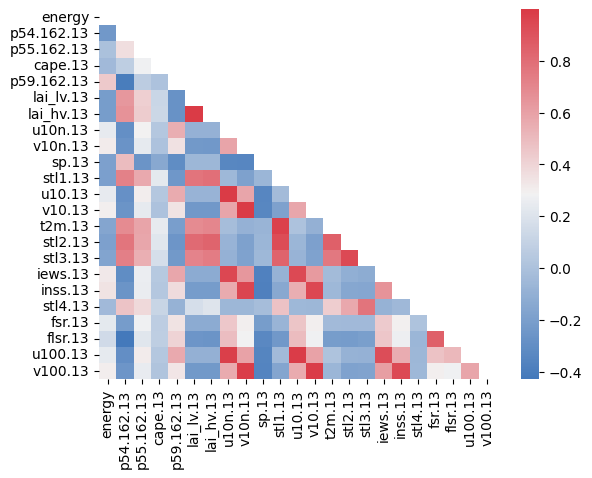

In [53]:
# Eliminamos la columna datetime para la matriz correlación
data_eda_corr = data_eda.drop(columns='datetime')
# creamos la matriz de correlación
corr = data_eda_corr.corr()
# Mostramos solo la mitad de la matriz
lower_tri = corr.where(np.tril(np.ones(corr.shape),k=-1).astype(bool)) 
# Creamos una paleta de colores en la cual rojo es muy correlacionado y azul no correlacionado
cmap = sns.diverging_palette(250, 10, as_cmap=True)
# Dibujamos el mapa de calor con la libreria "seaborn"
sns.heatmap(lower_tri, xticklabels=corr.columns, yticklabels=corr.columns, cmap= cmap)

# Mete en una lista los pares de columnas con una correlación mayor a 0.97
columnas_correlacionadas = []
for column in corr.columns:
    for index in corr.index:
        if corr.loc[index,column] > 0.97 and index != column:
            #no metemos la misma correlación dos veces
            if (column,index) not in columnas_correlacionadas:
                columnas_correlacionadas.append((index,column))
for columna in columnas_correlacionadas:
    print("Columnas correlacionadas: ", columna)

Gracias a este mapa de calor podemos observar que hay multiple variables de entrada con una alta correlación entre si como son: *lai_lv.13* y *lai_hv.13*. Concluyendo que una de estas variables se puede omitir.
Para el posterior analisis y decision de omitir ciertas variables se muestra en una lista de pares de columnas las variables con mayor correlación y se muestra la gráfica de cada columna para la comparación entre ellas.

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

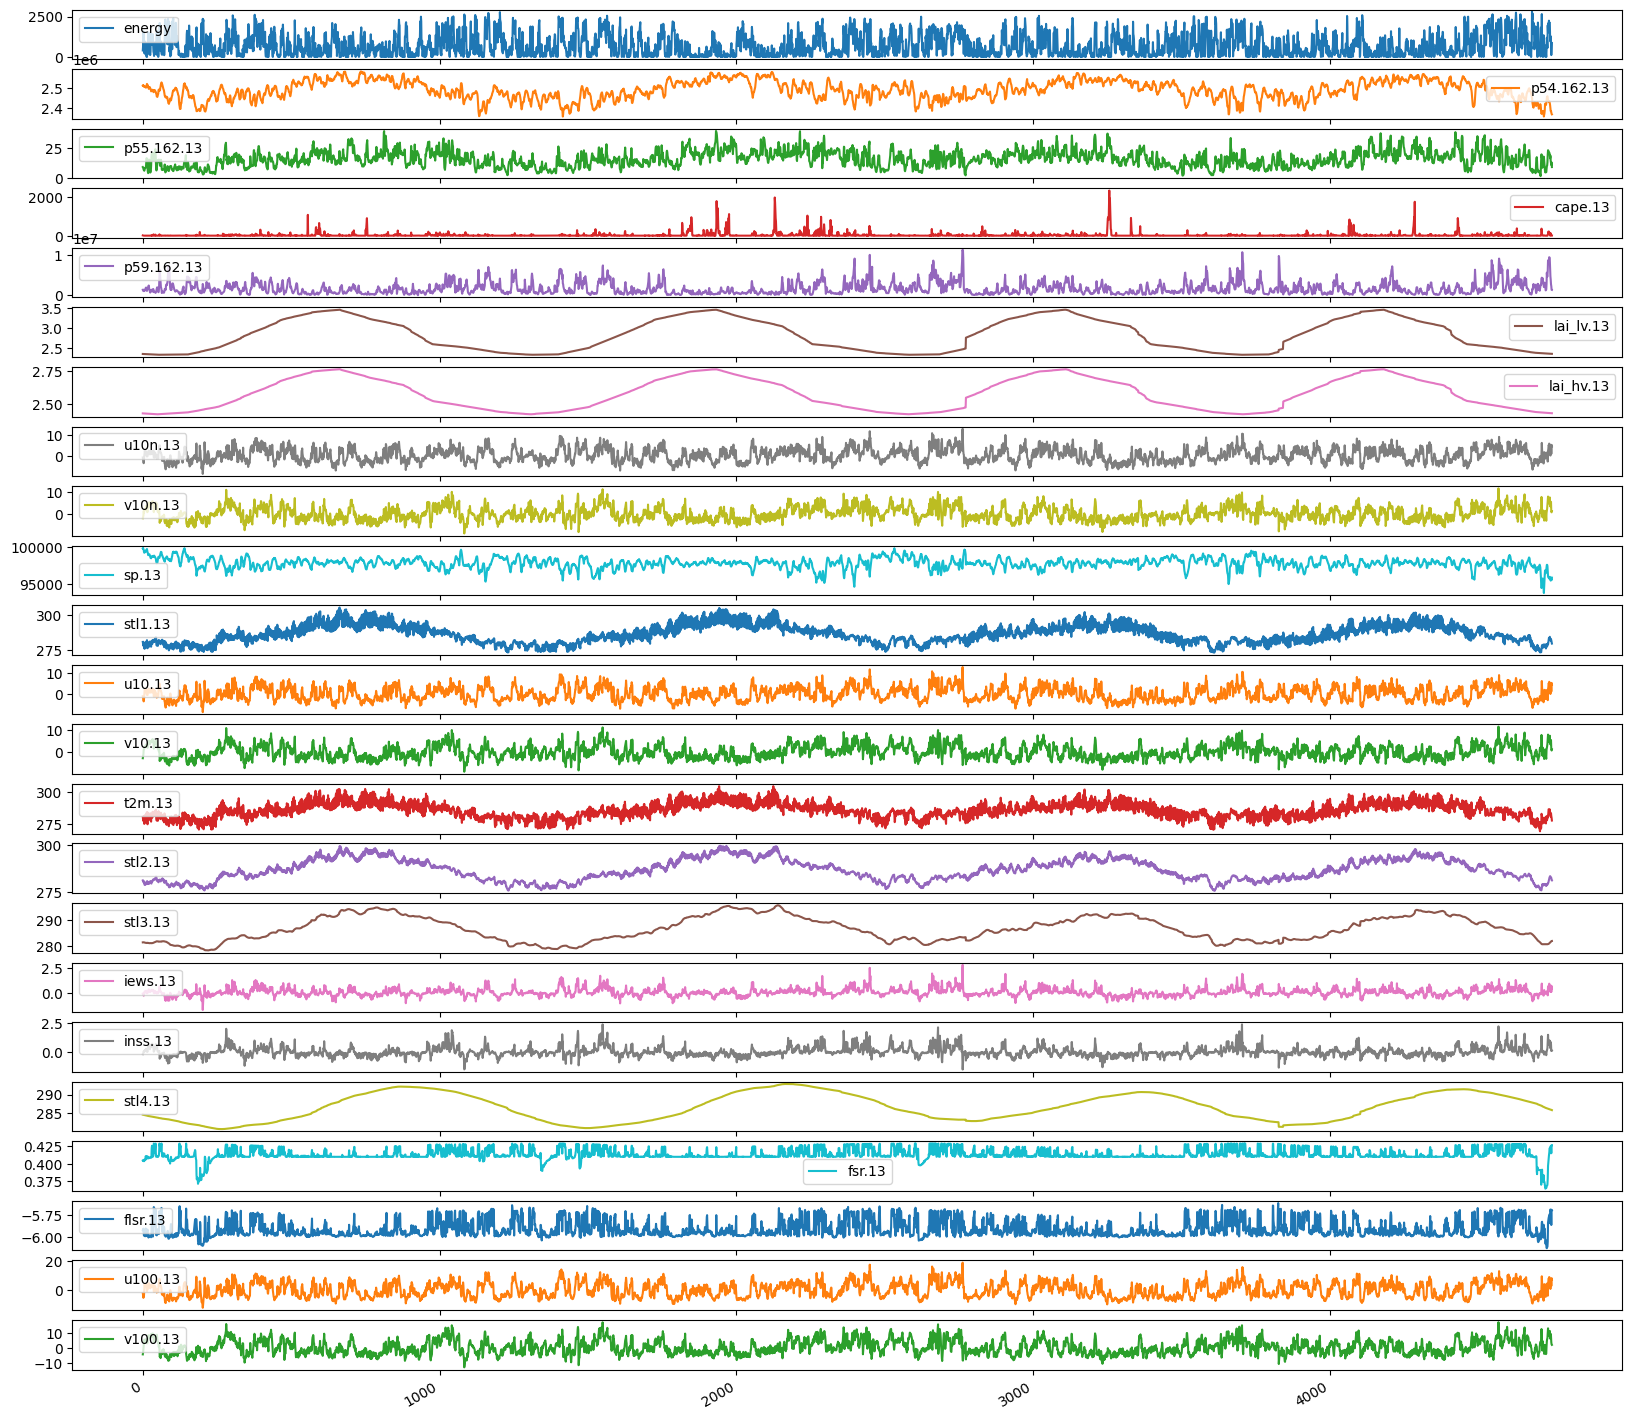

In [54]:
data_eda.plot(subplots=True, kind="line", sharex=True, figsize=(20, 20))

Tras analizar todas las variables que contienen nuestro datos, hemos decidido eliminar las siguientes debido a una alta correlación entre estas.
- lai_lv.13
- u10n.13
- v10n.13

In [55]:
# eliminamos de data las columnas correlacionadas "lai_lv.13","u10n.13", "v10n.13"
data = data.drop(columns=["lai_lv.13","u10n.13", "v10n.13"])

# 4.- Selección de Modelos

Una vez analizado el conjunto de datos y tomado las decisiones pertinentes para la creación de los modelos:
- Se debe dividir el conjunto de datos en entrenamiento, validación y test.
- Normalizar el conjunto de datos para los diferentes modelos.
- Evaluar los modelos en cuestión mediante valores por omisión.
- Ajuste de hiperparámetros y validación y evaluación de los modelos con los mejores parámetros.


## 4.1.- Conjunto de entrenamiento, test y validación

### 4.1.1.- Train, test y validación

Para una correcta división de los datos se debe dividir el conjunto según el tipo de evaluación que se vaya a realizar. Teniendo en cuenta los diferentes metodos de evaluación Inne y Outer.

#### Outer 

Para la evaluación externa de los datos (seleccion del modelo) mediante la observación y analisis de los datos en el EDA se observa que los datos son completos desde el inicio hasta 2008 conteniendo cada dia tres mediciones diferentes. Sin embargo, a partir de 2008 empiezan a faltar mediciones por lo que para una correcta evaluación del modelo se ha decidido dividir los datos en entrenamiento desde el dia 1 hasta el último dia de 2007, y en datos de test desde el primer dia de 2008 hasta el final de los datos.

In [56]:
# Dividimos el dataset en variables de datos y variable target
# Dividimos el dataset en entrenamiento y test
# Guardamos los datos en x
X_data = data.copy()
X_data = X_data.drop(columns='datetime')
y_data = X_data.pop('energy')
# X_train son los datos desde el principio hasta 31-12-2007
X_train = data[data['datetime'] < '2008-01-01']
# X_test son los datos desde 01-01-2008 hasta el final
X_test = data[data['datetime'] >= '2008-01-01']

# Dropea la coluna datetime
X_train = X_train.drop(columns='datetime')
X_test = X_test.drop(columns='datetime')

# Guardamos la variable target en y
y_train = X_train.pop('energy')
y_test = X_test.pop('energy')


#### Inner

Para la evaluación interna del modelo en el ajuste de hiperparametros, se ha decidido usar una división en entrenamiento y validación siguiendo una *Time series Split* este método permite una correcta división de los datos siguiendo una estructura temporal, evitando que a la hora de validar utilice datos mas antiguos que los datos de entrenamiento. Se ha decidido usar 3 splits para lograr asi una división anual en los datos.

In [57]:
# Dividimos X_train en entrenamiento y validación
tss=TimeSeriesSplit(n_splits=3)
for k, data in enumerate(tss.split(X_train, y_train)):
  cv_train, cv_val = data
  print(f"En la iteración {k+1}, los índices son:")
  print(f"  Train: {cv_train[0]} - {cv_train[-1]}")
  print(f"  Val: {cv_val[0]} - {cv_val[-1]}")

En la iteración 1, los índices son:
  Train: 0 - 912
  Val: 913 - 1824
En la iteración 2, los índices son:
  Train: 0 - 1824
  Val: 1825 - 2736
En la iteración 3, los índices son:
  Train: 0 - 2736
  Val: 2737 - 3648


### 4.1.2.- Normalización

Para el correcto entrenamiento de algunos modelos se debe normalizar ciertos datos, para que todos los datos influyan en el aprendizaje de una forma equitativa. Para ello, mediante KNN se comprueba que método de normalización o escalado es mas óptimo para el entrenamiento de los modelos.

#### Standard Scaler

In [58]:
standard_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())
standard_pipe.fit(X_train, y_train)
y_pred = standard_pipe.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)
score = standard_pipe.score(X_test, y_test)
print("Score: ", score)

MAE:  317.9043093721565
RMSE:  435.97896323740787
Score:  0.5893191306661857


#### MinMax Scaler

In [59]:
minmax_pipe = make_pipeline(MinMaxScaler(), KNeighborsRegressor())
minmax_pipe.fit(X_train, y_train)
y_pred = minmax_pipe.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)
score = minmax_pipe.score(X_test, y_test)
print("Score: ", score)

MAE:  346.52344494995447
RMSE:  472.0377659467629
Score:  0.518576931527768


#### Robust Scaler

In [60]:
robust_pipe = make_pipeline(RobustScaler(), KNeighborsRegressor())
robust_pipe.fit(X_train, y_train)
y_pred = robust_pipe.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)
score = robust_pipe.score(X_test, y_test)
print("Score: ", score)

MAE:  315.3460673339399
RMSE:  436.2214397308789
Score:  0.5888621905055713


Tras comparar las métricas de cada método de escalado, concluimos que el método mas adecuado para normalizar datos en nuestro problema es *Standard Scaler*.

## 4.2.- Modelos y datos obtenidos del EDA

In [61]:
metricas = []
scores = []

### 4.3.1.- Modelo Dummy

Primero creamos un modelo *Dummy* que servirá de modelo base, cualquier modelo que no supere las métricas de este, sera descartado.

In [62]:
dummy=DummyRegressor()
dummy_cv_mae = cross_val_score(dummy, X_train, y_train, cv=tss, scoring="neg_mean_absolute_error")  
dummy_cv_rmse = cross_val_score(dummy, X_train, y_train, cv=tss, scoring="neg_mean_squared_error")
print("MAE: ", -dummy_cv_mae.mean())
print("RMSE: ", np.sqrt(-dummy_cv_rmse.mean()))

metricas.append({'Model':'Dummy', 'MAE':-dummy_cv_mae.mean(), 'RMSE':np.sqrt(-dummy_cv_rmse.mean())})

MAE:  562.5481124227849
RMSE:  678.6212698476548


### 4.3.2.- KNN

In [63]:
knn=make_pipeline(StandardScaler(), KNeighborsRegressor())
knn_cv_mae = cross_val_score(knn, X_train, y_train, cv=tss, scoring="neg_mean_absolute_error")  
knn_cv_rmse = cross_val_score(knn, X_train, y_train, cv=tss, scoring="neg_mean_squared_error")
print("MAE: ", -knn_cv_mae.mean())
print("RMSE: ", np.sqrt(-knn_cv_rmse.mean()))

metricas.append({'Model':'KNN', 'MAE':-knn_cv_mae.mean(), 'RMSE':np.sqrt(-knn_cv_rmse.mean())})

MAE:  336.69936403508774
RMSE:  456.0685759359502


In [64]:
start = time.time()

knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())
knn_pipe.fit(X_train, y_train)
y_pred = knn_pipe.predict(X_test)

end = time.time()

mae = mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)
score = knn_pipe.score(X_test, y_test)
print("Score: ", score)
print("Tiempo de ejecución: ", end-start)

scores.append({'Model':'KNN Omisión', 'MAE':mae, 'RMSE':rmse, 'Score':score, 'Time':end-start})

MAE:  317.9043093721565
RMSE:  435.97896323740787
Score:  0.5893191306661857
Tiempo de ejecución:  0.06645607948303223


### 4.3.3.- Arboles de regresión

In [65]:
tree=make_pipeline( DecisionTreeRegressor())
tree_cv_mae = cross_val_score(knn, X_train, y_train, cv=tss, scoring="neg_mean_absolute_error")  
tree_cv_rmse = cross_val_score(knn, X_train, y_train, cv=tss, scoring="neg_mean_squared_error")
print("MAE: ", -tree_cv_mae.mean())
print("RMSE: ", np.sqrt(-tree_cv_rmse.mean()))

metricas.append({'Model':'Tree Omision', 'MAE':-tree_cv_mae.mean(), 'RMSE':np.sqrt(-tree_cv_rmse.mean())})

MAE:  336.69936403508774
RMSE:  456.0685759359502


In [66]:
start = time.time()

tree_pipe = make_pipeline(DecisionTreeRegressor())
tree_pipe.fit(X_train, y_train)
y_pred = tree_pipe.predict(X_test)

end = time.time()

mae = mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)
score = tree_pipe.score(X_test, y_test)
print("Score: ", score)
print("Tiempo de ejecución: ", end-start)

scores.append({'Model':'Tree Omisión', 'MAE':mae, 'RMSE':rmse, 'Score':score, 'Time':end-start})

MAE:  374.05348498635124
RMSE:  512.9575553479401
Score:  0.4314924116888461
Tiempo de ejecución:  0.06792807579040527


### 4.3.4.- Regresión Lineal

In [67]:
linear=make_pipeline(LinearRegression())
linear_cv_mae = cross_val_score(linear, X_train, y_train, cv=tss, scoring="neg_mean_absolute_error")  
linear_cv_rmse = cross_val_score(linear, X_train, y_train, cv=tss, scoring="neg_mean_squared_error")
print("MAE: ", -linear_cv_mae.mean())
print("RMSE: ", np.sqrt(-linear_cv_rmse.mean()))

metricas.append({'Model':'Linear Omision', 'MAE':-linear_cv_mae.mean(), 'RMSE':np.sqrt(-linear_cv_rmse.mean())})

MAE:  458.1857231671654
RMSE:  574.4315904106086


In [68]:
start = time.time()

linear_pipe = make_pipeline(LinearRegression())
linear_pipe.fit(X_train, y_train)
y_pred = linear_pipe.predict(X_test)

end = time.time()

mae = mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)
score = linear_pipe.score(X_test, y_test)
print("Score: ", score)
print("Tiempo de ejecución: ", end-start)

scores.append({'Model':'Linear Omisión', 'MAE':mae, 'RMSE':rmse, 'Score':score, 'Time':end-start})

MAE:  438.59092345322955
RMSE:  554.0444559253017
Score:  0.33677233886017877
Tiempo de ejecución:  0.0059795379638671875


### 4.3.5.- Regresión Lineal Lasso

In [69]:
lasso=make_pipeline(StandardScaler(), Lasso())
lasso_cv_mae = cross_val_score(lasso, X_train, y_train, cv=tss, scoring="neg_mean_absolute_error")  
lasso_cv_rmse = cross_val_score(lasso, X_train, y_train, cv=tss, scoring="neg_mean_squared_error")
print("MAE: ", -lasso_cv_mae.mean())
print("RMSE: ", np.sqrt(-lasso_cv_rmse.mean()))

metricas.append({'Model':'Lasso Omision', 'MAE':-lasso_cv_mae.mean(), 'RMSE':np.sqrt(-lasso_cv_rmse.mean())})

MAE:  455.8071896259794
RMSE:  571.2079166082291


In [70]:
start = time.time()

lasso_pipe = make_pipeline(StandardScaler(), Lasso())
lasso_pipe.fit(X_train, y_train)
y_pred = lasso_pipe.predict(X_test)

end = time.time()

mae = mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)
score = lasso_pipe.score(X_test, y_test)
print("Score: ", score)

scores.append({'Model':'Lasso Omisión', 'MAE':mae, 'RMSE':rmse, 'Score':score, 'Time':end-start})

MAE:  438.6556222143308
RMSE:  554.910762871021
Score:  0.33469666455326297


### 4.3.6.- SVM

In [71]:
svm=make_pipeline(StandardScaler(), SVR())
svm_cv_mae = cross_val_score(svm, X_train, y_train, cv=tss, scoring="neg_mean_absolute_error")  
svm_cv_rmse = cross_val_score(svm, X_train, y_train, cv=tss, scoring="neg_mean_squared_error")
print("MAE: ", -svm_cv_mae.mean())
print("RMSE: ", np.sqrt(-svm_cv_rmse.mean()))

metricas.append({'Model':'SVM Omision', 'MAE':-svm_cv_mae.mean(), 'RMSE':np.sqrt(-svm_cv_rmse.mean())})

MAE:  510.6107965880414
RMSE:  683.7143013226492


In [72]:
start = time.time()

svm_pipe = make_pipeline(StandardScaler(), SVR())
svm_pipe.fit(X_train, y_train)
y_pred = svm_pipe.predict(X_test)

end = time.time()

mae = mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)
score = svm_pipe.score(X_test, y_test)
print("Score: ", score)
print("Tiempo de ejecución: ", end-start)

scores.append({'Model':'SVM Omisión', 'MAE':mae, 'RMSE':rmse, 'Score':score, 'Time':end-start})

MAE:  484.9255129612361
RMSE:  659.833690963138
Score:  0.05931898824852522
Tiempo de ejecución:  0.7707059383392334


## 4.3.- Modelos con HPO y datos obtenidos del EDA

### 4.3.2.- KNN

Hacemos ajuste de hiperparámetros

In [73]:
start = time.time()

knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsRegressor())])

param_grid = {
    'knn__n_neighbors': np.arange(5, 15),
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2, 3]
}

grid = GridSearchCV(
    knn_pipe,
    param_grid,
    scoring=['neg_mean_absolute_error', 'neg_root_mean_squared_error'], 
    refit='neg_root_mean_squared_error',
    cv=tss,
    verbose=3)

np.random.seed(100451286)
grid.fit(X_train, y_train)

end = time.time()

knn_best_params = grid.best_params_

print("Tiempo de ejecución: ", end - start)
print("Mejor modelo: ", grid.best_estimator_)
print("Mejor score: ", -grid.best_score_)

metricas.append({'Model':'KNN GridSearch', 'MAE':-grid.cv_results_['mean_test_neg_mean_absolute_error'][grid.best_index_], 'RMSE':-grid.best_score_})

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV 1/3] END knn__n_neighbors=5, knn__p=1, knn__weights=uniform; neg_mean_absolute_error: (test=-343.627) neg_root_mean_squared_error: (test=-455.207) total time=   0.0s
[CV 2/3] END knn__n_neighbors=5, knn__p=1, knn__weights=uniform; neg_mean_absolute_error: (test=-301.033) neg_root_mean_squared_error: (test=-411.259) total time=   0.0s
[CV 3/3] END knn__n_neighbors=5, knn__p=1, knn__weights=uniform; neg_mean_absolute_error: (test=-331.885) neg_root_mean_squared_error: (test=-460.281) total time=   0.0s
[CV 1/3] END knn__n_neighbors=5, knn__p=1, knn__weights=distance; neg_mean_absolute_error: (test=-342.552) neg_root_mean_squared_error: (test=-454.068) total time=   0.0s
[CV 2/3] END knn__n_neighbors=5, knn__p=1, knn__weights=distance; neg_mean_absolute_error: (test=-300.271) neg_root_mean_squared_error: (test=-411.044) total time=   0.0s
[CV 3/3] END knn__n_neighbors=5, knn__p=1, knn__weights=distance; neg_mean_absolute_er

Evaluamos el rendimiento futuro de el modelo con los mejores parámetros.

In [74]:
# Validamos el modelo knn con los datos de test y los mejores parámetros
np.random.seed(100451286)
best_knn = grid.best_estimator_
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)
score = best_knn.score(X_test, y_test)
print("Score: ", score)

scores.append({'Model':'KNN GridSearch', 'MAE':mae, 'RMSE':rmse, 'Score':score, 'Time':end-start})

MAE:  306.8543598235937
RMSE:  414.0977104382247
Score:  0.629507805571941


### 4.3.3.- Arboles de regresión

Hacemos ajuste de hiperparámetros

In [75]:
start = time.time()
tree_pipe = Pipeline([('Tree', DecisionTreeRegressor())])

param_grid = {
    'Tree__max_depth': np.arange(2, 16),
    'Tree__min_samples_split': np.arange(2, 16),
    }

grid = GridSearchCV(
    tree_pipe,
    param_grid,
    scoring=['neg_mean_absolute_error', 'neg_root_mean_squared_error'],
    refit='neg_root_mean_squared_error',
    cv=tss,
    verbose=3,)

np.random.seed(100451286)
grid.fit(X_train, y_train)

end = time.time()

tree_best_params_pipe = grid.best_params_

print("Tiempo de ejecución: ", end - start)
print("Mejor modelo: ", grid.best_estimator_)
print("Mejor score: ", -grid.best_score_)

metricas.append({'Model':'Tree GridSearch', 'MAE':-grid.cv_results_['mean_test_neg_mean_absolute_error'][grid.best_index_], 'RMSE':-grid.best_score_})

Fitting 3 folds for each of 196 candidates, totalling 588 fits
[CV 1/3] END Tree__max_depth=2, Tree__min_samples_split=2; neg_mean_absolute_error: (test=-426.914) neg_root_mean_squared_error: (test=-543.427) total time=   0.0s
[CV 2/3] END Tree__max_depth=2, Tree__min_samples_split=2; neg_mean_absolute_error: (test=-391.104) neg_root_mean_squared_error: (test=-482.878) total time=   0.0s
[CV 3/3] END Tree__max_depth=2, Tree__min_samples_split=2; neg_mean_absolute_error: (test=-379.441) neg_root_mean_squared_error: (test=-481.597) total time=   0.0s
[CV 1/3] END Tree__max_depth=2, Tree__min_samples_split=3; neg_mean_absolute_error: (test=-426.914) neg_root_mean_squared_error: (test=-543.427) total time=   0.0s
[CV 2/3] END Tree__max_depth=2, Tree__min_samples_split=3; neg_mean_absolute_error: (test=-391.104) neg_root_mean_squared_error: (test=-482.878) total time=   0.0s
[CV 3/3] END Tree__max_depth=2, Tree__min_samples_split=3; neg_mean_absolute_error: (test=-379.441) neg_root_mean_squ

Evaluamos el rendimiento futuro de el modelo con los mejores parámetros.

In [76]:
# Validamos el modelo decision tree con los datos de test y los mejores parámetros
np.random.seed(100451286)
best_tree = grid.best_estimator_
best_tree.fit(X_train, y_train)
y_pred = best_tree.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)
score = best_tree.score(X_test, y_test)
print("Score: ", score)

scores.append({'Model':'Tree GridSearch', 'MAE':mae, 'RMSE':rmse, 'Score':score, 'Time':end-start})

MAE:  336.69419067852147
RMSE:  443.8752957422921
Score:  0.5743081324846173


### 4.3.4.- Regresión Lineal

Hacemos ajuste de hiperparámetros

In [77]:
#Regresion lineal con ajuste de hiperparametros
start = time.time()

linear_pipe = Pipeline([('scaler', StandardScaler()),('linear', LinearRegression())])

param_grid = {
    'linear__fit_intercept': [True, False]
}

grid = GridSearchCV(
    linear_pipe,
    param_grid,
    scoring=['neg_mean_absolute_error', 'neg_root_mean_squared_error'],
    refit='neg_root_mean_squared_error',
    cv=tss,
    verbose=3)

np.random.seed(100451286)
grid.fit(X_train, y_train)
    
end = time.time()

print("Tiempo de ejecución: ", end - start)
print("Mejor modelo: ", grid.best_estimator_)
print("Mejor score: ", -grid.best_score_)

metricas.append({'Model':'Linear GridSearch', 'MAE':-grid.cv_results_['mean_test_neg_mean_absolute_error'][grid.best_index_], 'RMSE':-grid.best_score_})

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV 1/3] END linear__fit_intercept=True; neg_mean_absolute_error: (test=-521.581) neg_root_mean_squared_error: (test=-629.001) total time=   0.0s
[CV 2/3] END linear__fit_intercept=True; neg_mean_absolute_error: (test=-413.203) neg_root_mean_squared_error: (test=-534.393) total time=   0.0s
[CV 3/3] END linear__fit_intercept=True; neg_mean_absolute_error: (test=-439.774) neg_root_mean_squared_error: (test=-555.605) total time=   0.0s
[CV 1/3] END linear__fit_intercept=False; neg_mean_absolute_error: (test=-666.969) neg_root_mean_squared_error: (test=-880.970) total time=   0.0s
[CV 2/3] END linear__fit_intercept=False; neg_mean_absolute_error: (test=-684.196) neg_root_mean_squared_error: (test=-838.983) total time=   0.0s
[CV 3/3] END linear__fit_intercept=False; neg_mean_absolute_error: (test=-684.134) neg_root_mean_squared_error: (test=-862.222) total time=   0.0s
Tiempo de ejecución:  0.0453643798828125
Mejor modelo:  Pipeli

Evaluamos el rendimiento futuro de el modelo con los mejores parámetros.

In [78]:
# Evaluamos el modelo de regresión lineal con los datos de test y los mejores parámetros
np.random.seed(100451286)
best_linear = grid.best_estimator_
best_linear.fit(X_train, y_train)
y_pred = best_linear.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)
score = best_linear.score(X_test, y_test)
print("Score: ", score)

scores.append({'Model':'Linear GridSearch', 'MAE':mae, 'RMSE':rmse, 'Score':score, 'Time':end-start})

MAE:  438.59092345338524
RMSE:  554.044455925315
Score:  0.3367723388601469


### 4.3.5.- Regresión Lineal (Lasso)

Hacemos el ajuste hiperparámetros

In [79]:
# Lasso con ajuste de hiperparámetros
start = time.time()

lasso_pipe = Pipeline([('scaler', StandardScaler()),('lasso', Lasso())])

param_grid = {
    'lasso__alpha': np.arange(0.1,10)
}

grid = GridSearchCV(
    lasso_pipe,
    param_grid,
    scoring=['neg_mean_absolute_error', 'neg_root_mean_squared_error'],
    refit='neg_root_mean_squared_error',
    cv=tss,
    verbose=3)

np.random.seed(100451286)
grid.fit(X_train, y_train)

end = time.time()

print("Tiempo de ejecución: ", end - start)
print("Mejor modelo: ", grid.best_estimator_)
print("Mejor score: ", -grid.best_score_)

metricas.append({'Model':'Lasso GridSearch', 'MAE':-grid.cv_results_['mean_test_neg_mean_absolute_error'][grid.best_index_], 'RMSE':-grid.best_score_})

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END lasso__alpha=0.1; neg_mean_absolute_error: (test=-521.160) neg_root_mean_squared_error: (test=-628.310) total time=   0.0s
[CV 2/3] END lasso__alpha=0.1; neg_mean_absolute_error: (test=-412.717) neg_root_mean_squared_error: (test=-533.869) total time=   0.0s
[CV 3/3] END lasso__alpha=0.1; neg_mean_absolute_error: (test=-439.571) neg_root_mean_squared_error: (test=-555.529) total time=   0.0s
[CV 1/3] END lasso__alpha=1.1; neg_mean_absolute_error: (test=-517.652) neg_root_mean_squared_error: (test=-622.394) total time=   0.0s
[CV 2/3] END lasso__alpha=1.1; neg_mean_absolute_error: (test=-410.148) neg_root_mean_squared_error: (test=-530.488) total time=   0.0s


[CV 3/3] END lasso__alpha=1.1; neg_mean_absolute_error: (test=-439.111) neg_root_mean_squared_error: (test=-556.020) total time=   0.0s
[CV 1/3] END lasso__alpha=2.1; neg_mean_absolute_error: (test=-514.567) neg_root_mean_squared_error: (test=-618.419) total time=   0.0s
[CV 2/3] END lasso__alpha=2.1; neg_mean_absolute_error: (test=-409.779) neg_root_mean_squared_error: (test=-528.219) total time=   0.0s
[CV 3/3] END lasso__alpha=2.1; neg_mean_absolute_error: (test=-438.526) neg_root_mean_squared_error: (test=-556.088) total time=   0.0s
[CV 1/3] END lasso__alpha=3.1; neg_mean_absolute_error: (test=-514.797) neg_root_mean_squared_error: (test=-618.625) total time=   0.0s
[CV 2/3] END lasso__alpha=3.1; neg_mean_absolute_error: (test=-410.604) neg_root_mean_squared_error: (test=-527.770) total time=   0.0s
[CV 3/3] END lasso__alpha=3.1; neg_mean_absolute_error: (test=-438.893) neg_root_mean_squared_error: (test=-556.291) total time=   0.0s
[CV 1/3] END lasso__alpha=4.1; neg_mean_absolute

Evaluamos el rendimiento futuro de el modelo con los mejores parámetros.

In [80]:
# Evaluamos el modelo Lasso con los datos de test y los mejores parámetros
np.random.seed(100451286)
best_lasso = grid.best_estimator_
best_lasso.fit(X_train, y_train)
y_pred = best_lasso.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)
score = best_lasso.score(X_test, y_test)
print("Score: ", score)

scores.append({'Model':'Lasso GridSearch', 'MAE':mae, 'RMSE':rmse, 'Score':score, 'Time':end-start})

MAE:  439.4281409504965
RMSE:  555.0464414108875
Score:  0.33437128459460097


### 4.3.6.- SVM

Hacemos ajuste de hiperparámetros.

In [81]:
# SVR con ajuste de hiperparámetros
start = time.time()

svm_pipe = Pipeline([('scaler', StandardScaler()),('svm', SVR())])

param_grid = {
    'svm__C': np.arange(100,1000,100),
    'svm__gamma': ['scale', 'auto']    
}

grid = GridSearchCV(
    svm_pipe,
    param_grid,
    scoring= ['neg_mean_absolute_error', 'neg_root_mean_squared_error'],
    refit='neg_root_mean_squared_error',
    cv=tss,
    verbose=3)

np.random.seed(100451286)
grid.fit(X_train, y_train)
    
end = time.time()

print("Tiempo de ejecución: ", end - start)
print("Mejor modelo: ", grid.best_estimator_)
print("Mejor score: ", -grid.best_score_)

metricas.append({'Model':'SVM GridSearch', 'MAE':-grid.cv_results_['mean_test_neg_mean_absolute_error'][grid.best_index_], 'RMSE':-grid.best_score_})

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END svm__C=100, svm__gamma=scale; neg_mean_absolute_error: (test=-357.369) neg_root_mean_squared_error: (test=-486.144) total time=   0.0s
[CV 2/3] END svm__C=100, svm__gamma=scale; neg_mean_absolute_error: (test=-273.938) neg_root_mean_squared_error: (test=-373.770) total time=   0.2s
[CV 3/3] END svm__C=100, svm__gamma=scale; neg_mean_absolute_error: (test=-310.059) neg_root_mean_squared_error: (test=-424.866) total time=   0.4s
[CV 1/3] END svm__C=100, svm__gamma=auto; neg_mean_absolute_error: (test=-357.369) neg_root_mean_squared_error: (test=-486.144) total time=   0.0s
[CV 2/3] END svm__C=100, svm__gamma=auto; neg_mean_absolute_error: (test=-273.938) neg_root_mean_squared_error: (test=-373.770) total time=   0.1s
[CV 3/3] END svm__C=100, svm__gamma=auto; neg_mean_absolute_error: (test=-310.059) neg_root_mean_squared_error: (test=-424.866) total time=   0.4s
[CV 1/3] END svm__C=200, svm__gamma=scale; neg_mean_ab

Evaluamos el rendimiento futuro de el modelo con los mejores parámetros.

In [82]:
# Evaluamos el modelo SVR con los datos de test y los mejores parámetros
np.random.seed(100451286)
best_svm = grid.best_estimator_
best_svm.fit(X_train, y_train)
y_pred = best_svm.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)
score = best_svm.score(X_test, y_test)
print("Score: ", score)

scores.append({'Model':'SVM GridSearch', 'MAE':mae, 'RMSE':rmse, 'Score':score, 'Time':end-start})

mejor_modelo = grid.best_estimator_

MAE:  276.8863826592522
RMSE:  381.13932258044514
Score:  0.6861364232719163


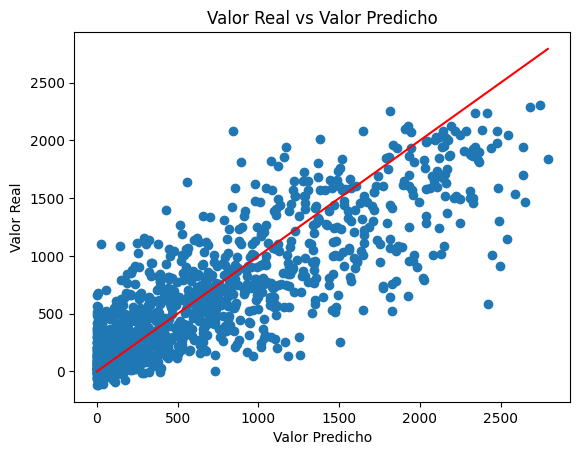

In [83]:
plt.scatter(y_test, y_pred)
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.title('Valor Real vs Valor Predicho')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')

Haciendo una división entre los valores altos y bajos hemos hecho una comparación a los modelos predichos y a lo que se esperaba de los valores. La línea roja diagonal en el gráfico, es un trazo desde el valor mínimo de y_test hasta el valor máximo de y_test. Esta línea representa una línea ideal en la que los valores predichos serían exactamente iguales a los valores reales. Nos ayuda así a visualizar cómo se asemejan las predicciones del modelo con los valores reales. Si los puntos del gráfico están cerca de esta línea, significa que las predicciones del modelo están cerca de los valores reales, mirando el gráfico podemos ver que los valores bajos se acercan más a la línea, mientras que en los altos hay una mayor dispersión entre los valores ideales y los valores reales. Además podemos ver, a parte de la mayor cercania de los valores bajos a la línea, una mayor concentración y cantidad de valores bajos, en comparación de altos, debido a la división que hemos llevado a cabo delimitando ambas partes.

## 5.- Conclusiones

Una vez generado todos los modelos con el ajuste de hiperparametros, debemos comparar y evaluar los modelos según las metricas elegidas. Dado que durante el ajuste la métrica elegida como score es *root_mean_square_error*, sin embargo para el analisis se usará tambien el *mean_absolute_error*. A continuación de muestra en un gráfico los valores obtenido al final de cada modelo.

,Model,MAE,RMSE
0,Dummy,562.548112,678.621270
1,KNN,336.699364,456.068576
2,Tree Omision,336.699364,456.068576
3,Linear Omision,458.185723,574.431590
4,Lasso Omision,455.807190,571.207917
5,SVM Omision,510.610797,683.714301
6,KNN GridSearch,314.658190,424.769376
7,Tree GridSearch,323.011845,434.676073
8,Linear GridSearch,458.185723,572.999657
9,Lasso GridSearch,454.764652,567.562329


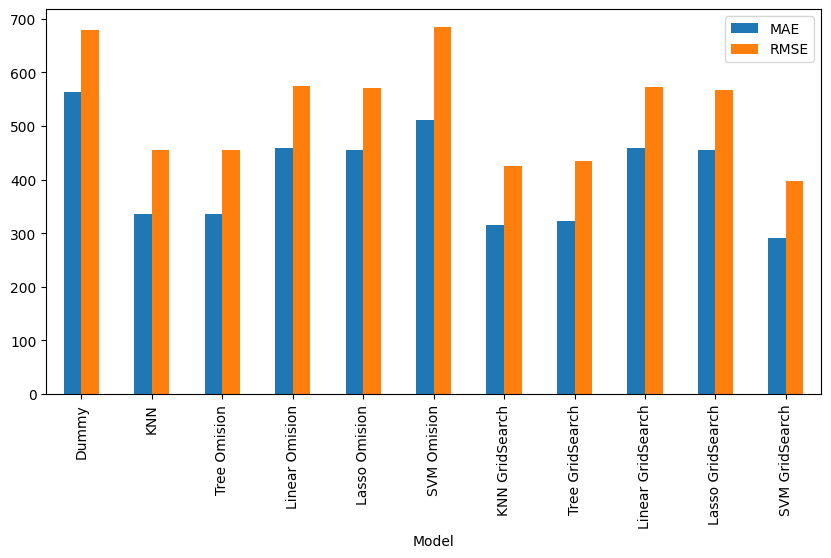

In [84]:
metricas = pd.DataFrame(metricas)
metricas.plot(x='Model', y=['MAE', 'RMSE'], kind='bar', figsize=(10, 5))
display(metricas)

Antes de decidir que modelo es el mas óptimo observamos que la mayoria de los modelos no superan las métricas obtenidas en el modelo trivial *Dummy* por lo que todos los modelos son aptos para este problema. Adémas podemos ver que en la mayoria de los modelos en los que se ajusta hiperparámetros se obtiene una cierta mejoria con respecto a las métricas obtenidas en los modelos con hiperparámetros por omisión. Esto significa que hemos obtenido modelos con parametros mas óptimos y por tanto un mayor rendimiento. Por último, podemos ver que el modelo que obtiene menos RMSE y MAE es el SVM con ajuste de hiperparámetros. Además, en cuanto a tiempo de ejecución como medida de elección si comparamos los modelos con menores errores SVM y KNN hay una clara diferencia en cuanto al tiempo de entrenamiento siendo SVM mucho mas rápido y obteniendo mejores métricas. No obstante, también hay que comparar el rendimiento futuro de cada modelo por lo que se entrena con el conjunto de datos de *test*, para ello se ha obtenido el RMSE, MAE y score.

,Model,MAE,RMSE,Score,Time
0,KNN Omisión,317.904309,435.978963,0.589319,0.066456
1,Tree Omisión,374.053485,512.957555,0.431492,0.067928
2,Linear Omisión,438.590923,554.044456,0.336772,0.005980
3,Lasso Omisión,438.655622,554.910763,0.334697,0.031257
4,SVM Omisión,484.925513,659.833691,0.059319,0.770706
5,KNN GridSearch,306.854360,414.097710,0.629508,46.634102
6,Tree GridSearch,336.694191,443.875296,0.574308,10.220251
7,Linear GridSearch,438.590923,554.044456,0.336772,0.045364
8,Lasso GridSearch,439.428141,555.046441,0.334371,0.289481
9,SVM GridSearch,276.886383,381.139323,0.686136,16.669585


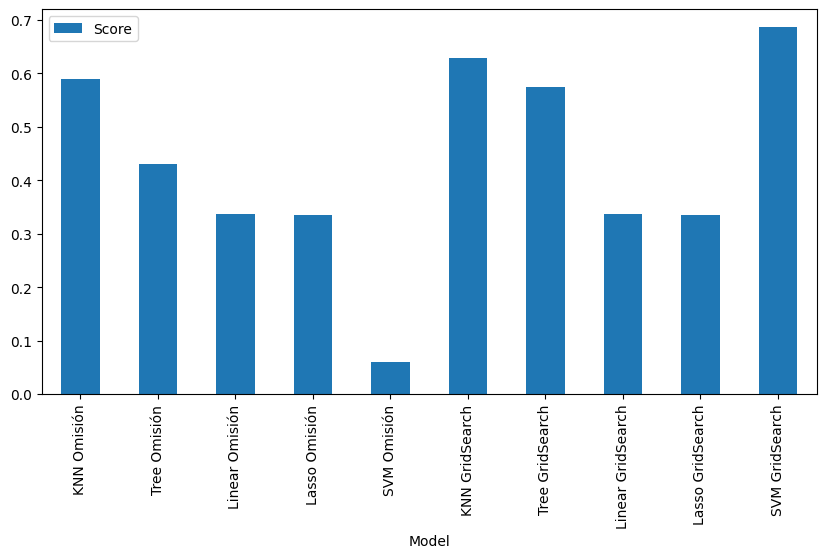

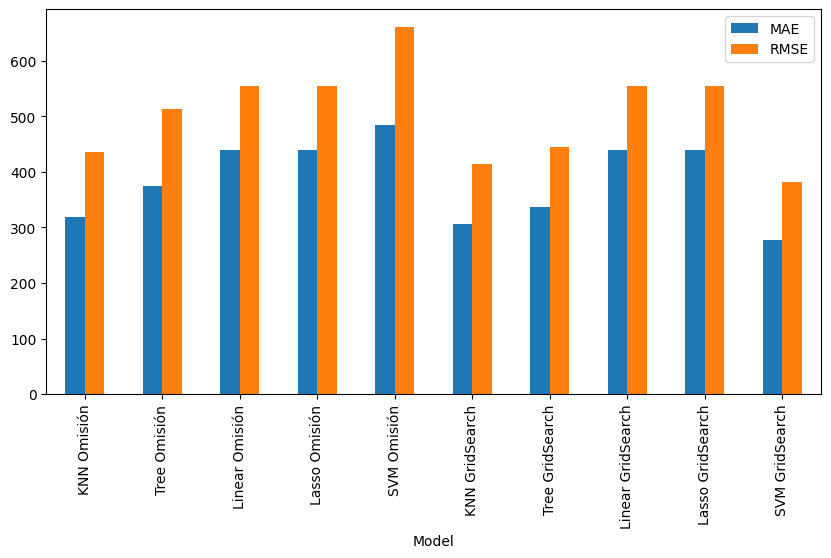

In [85]:

scores_df = pd.DataFrame(scores)
scores_df.plot(x='Model', y=['Score'], kind='bar', figsize=(10, 5))
scores_df.plot(x='Model', y=['MAE', 'RMSE'], kind='bar', figsize=(10, 5))
display(scores_df)

Como se puede observar en los gráficos vemos que el mejor score lo posee SVM con HPO y a su vez posee el menor RMSE y MAE siendo asi el modelo que mejor se ajusta a la predicción de datos que no han sido vistos previamente. Se puede ver que hay una alta diferencia entre SVM por omisión y HPO esto se debe al aumento en el parametro *c* que se encarga de la regularización del modelo y en este caso en valores por omisión *c=1.0* es decir se regula de forma moderada.
Por lo que el modelo seleccionado es SVM. Cabe destacar que estos resultado son pesimistas puesto que no se esta entrenando con todo el conjunto de datos de entrenamiento, por lo que se espera que las metricas de error sean mejores con el modelo final ya que este si se entrena con todos los datos.

In [86]:
# Generamos un archivo pickle con el mejor modelo
#entrenando con todos los datos 
mejor_modelo.fit(X_data, y_data)
with open('modelo_final.pkl', 'wb') as file:
    pickle.dump(mejor_modelo, file)